# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
weather_api_key

'5038cf4afa60a38fb2b6b761f6038892'

In [8]:
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'



In [9]:
print(requests.get(url))

<Response [200]>


In [10]:
print(requests.get(url).ok)

True


In [11]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'# YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE
        city_lng = city_weather['coord']['lon']# YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']# YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']# YOUR CODE HERE
        city_wind = city_weather['wind']['speed']# YOUR CODE HERE
        city_country = city_weather['sys']['country']# YOUR CODE HERE
        city_date = city_weather['dt']# YOUR CODE HER

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papao
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | tual
Processing Record 6 of Set 1 | cockburn town
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | la mira
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | bharatpur
Processing Record 11 of Set 1 | puerto baquerizo moreno
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | shimoda
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | pangoa
Processing Record 21 of Set 1 | oranjemund
Processing Rec

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [13]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papao,-17.7500,-149.5500,25.82,73,2,3.17,PF,1729050072
1,petropavlovsk-kamchatsky,53.0452,158.6483,8.33,66,20,7.00,RU,1729049782
2,adamstown,-25.0660,-130.1015,21.27,88,98,6.71,PN,1729050074
3,tual,-5.6667,132.7500,27.71,76,68,5.18,ID,1729050077
4,cockburn town,21.4612,-71.1419,29.34,71,9,7.79,TC,1729049804
5,lebu,-37.6167,-73.6500,9.92,84,99,2.15,CL,1729050079
6,la mira,18.0350,-102.3266,25.08,92,20,1.65,MX,1729050080
7,jamestown,42.0970,-79.2353,6.12,88,100,4.12,US,1729049838
8,bharatpur,27.2167,77.4833,29.91,25,17,2.29,IN,1729050082
9,puerto baquerizo moreno,-0.9000,-89.6000,20.53,89,59,5.60,EC,1729050083


In [14]:
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papao,-17.7500,-149.5500,25.82,73,2,3.17,PF,2024-10-16
1,petropavlovsk-kamchatsky,53.0452,158.6483,8.33,66,20,7.00,RU,2024-10-16
2,adamstown,-25.0660,-130.1015,21.27,88,98,6.71,PN,2024-10-16
3,tual,-5.6667,132.7500,27.71,76,68,5.18,ID,2024-10-16
4,cockburn town,21.4612,-71.1419,29.34,71,9,7.79,TC,2024-10-16


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papao,-17.7500,-149.5500,25.82,73,2,3.17,PF,2024-10-16
1,petropavlovsk-kamchatsky,53.0452,158.6483,8.33,66,20,7.00,RU,2024-10-16
2,adamstown,-25.0660,-130.1015,21.27,88,98,6.71,PN,2024-10-16
3,tual,-5.6667,132.7500,27.71,76,68,5.18,ID,2024-10-16
4,cockburn town,21.4612,-71.1419,29.34,71,9,7.79,TC,2024-10-16


In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papao,-17.7500,-149.5500,25.82,73,2,3.17,PF,2024-10-16
1,petropavlovsk-kamchatsky,53.0452,158.6483,8.33,66,20,7.00,RU,2024-10-16
2,adamstown,-25.0660,-130.1015,21.27,88,98,6.71,PN,2024-10-16
3,tual,-5.6667,132.7500,27.71,76,68,5.18,ID,2024-10-16
4,cockburn town,21.4612,-71.1419,29.34,71,9,7.79,TC,2024-10-16


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

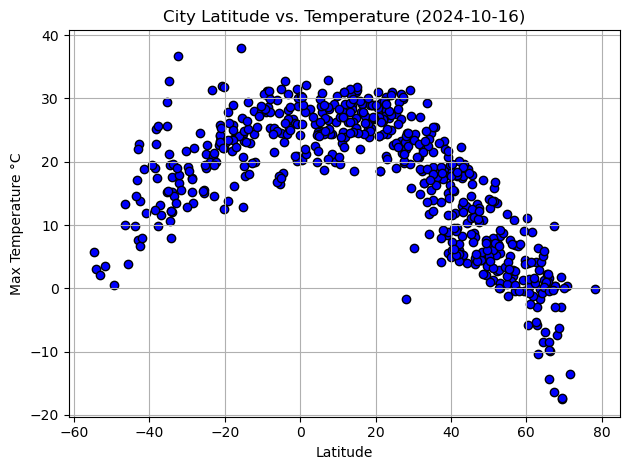

In [18]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

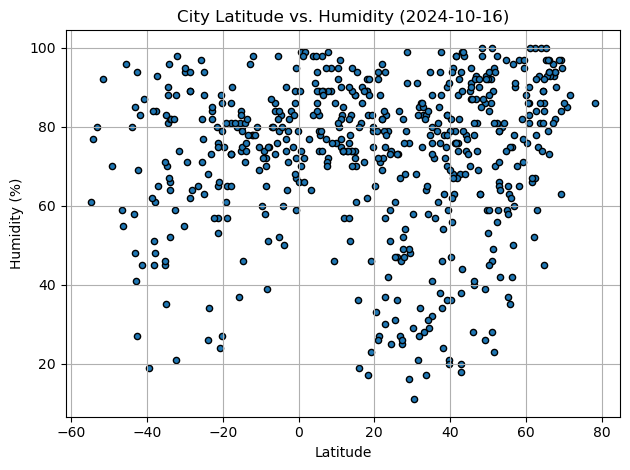

In [73]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

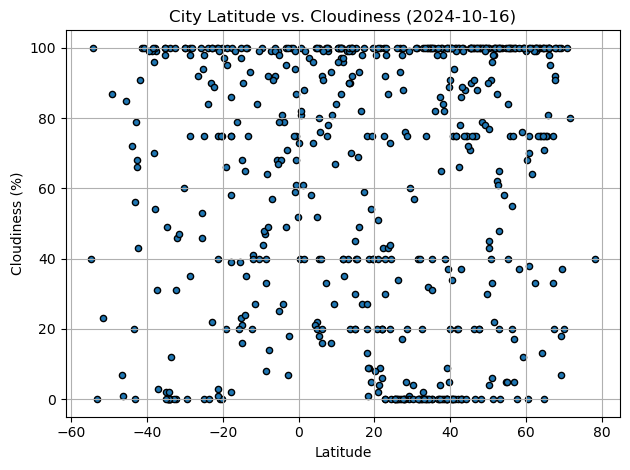

In [22]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

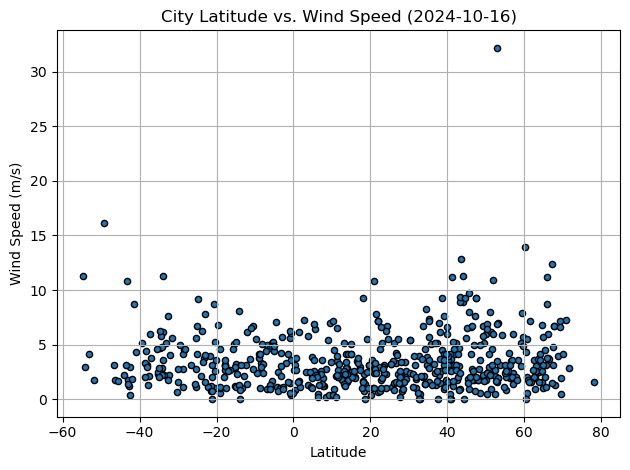

In [24]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='c', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]


In [27]:
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]


Linear equation: y = -0.51x + 33.82
The r-value is: -0.8753017383336431


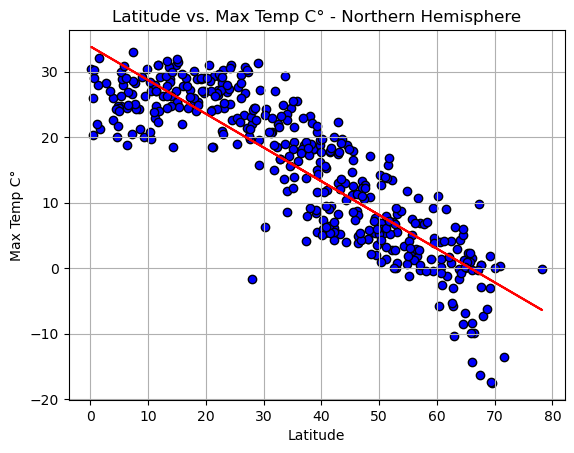

In [28]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Max Temp C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,petropavlovsk-kamchatsky,53.0452,158.6483,8.33,66,20,7.00,RU,2024-10-16
4,cockburn town,21.4612,-71.1419,29.34,71,9,7.79,TC,2024-10-16
6,la mira,18.0350,-102.3266,25.08,92,20,1.65,MX,2024-10-16
7,jamestown,42.0970,-79.2353,6.12,88,100,4.12,US,2024-10-16
8,bharatpur,27.2167,77.4833,29.91,25,17,2.29,IN,2024-10-16


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papao,-17.7500,-149.5500,25.82,73,2,3.17,PF,2024-10-16
2,adamstown,-25.0660,-130.1015,21.27,88,98,6.71,PN,2024-10-16
3,tual,-5.6667,132.7500,27.71,76,68,5.18,ID,2024-10-16
5,lebu,-37.6167,-73.6500,9.92,84,99,2.15,CL,2024-10-16
9,puerto baquerizo moreno,-0.9000,-89.6000,20.53,89,59,5.60,EC,2024-10-16


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.51x + 33.82
The r-value is: -0.8753017383336431


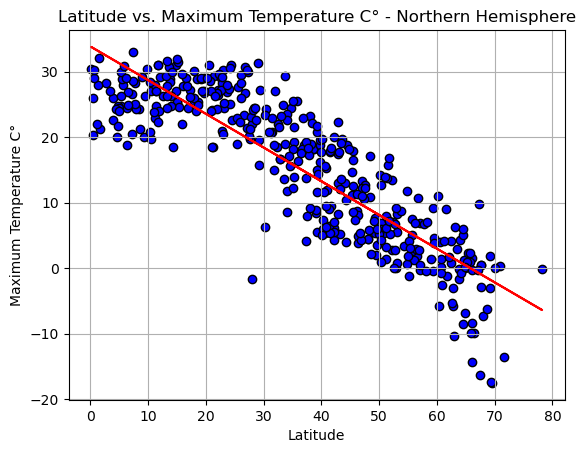

In [32]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.34x + 28.41
The r-value is: 0.6641931584487927


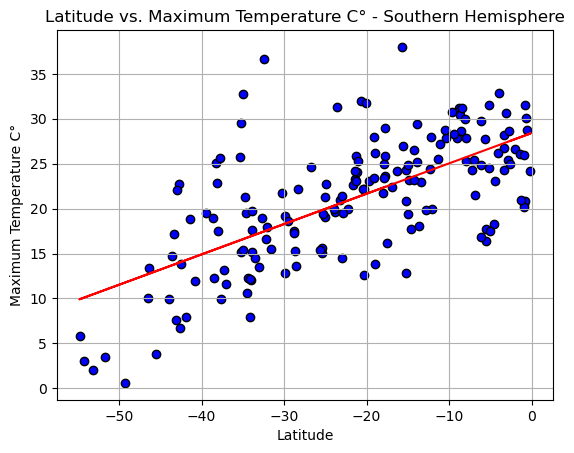

In [33]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** The figure shows an increse on the temperature in cities from around 0 to around 35 in celcius along the latitudes below -50 and 0 for the southern hemisphere, which means that the higher the latitude the better the weather conditions in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.07x + 70.5
The r-value is: 0.06553445356580237


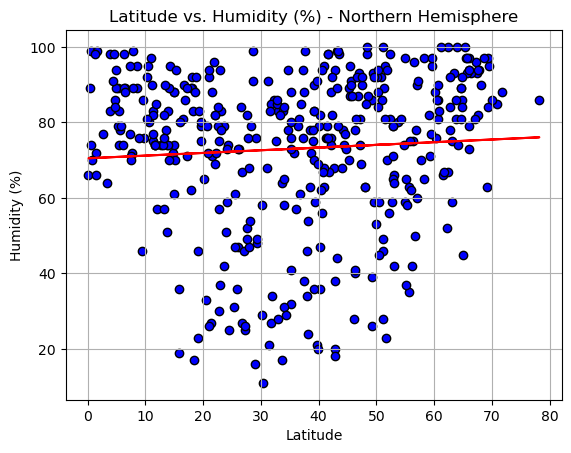

In [36]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.19x + 75.99
The r-value is: 0.15633998760659937


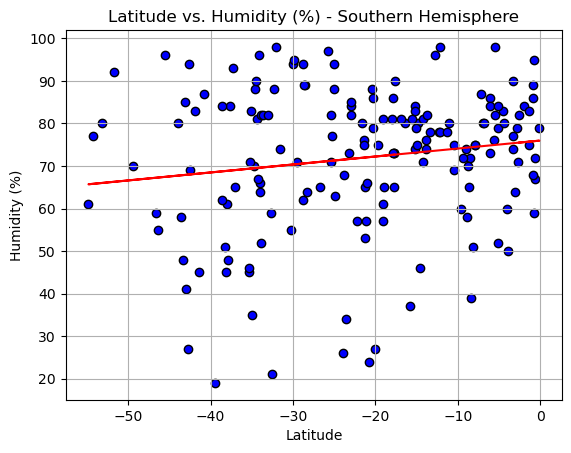

In [37]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** The line shows an slight increase of the humidity from above 60% to below 80% in humidity and between -60 to 0 latitude for the southern hemisphere, which means that the closer to 0 the higher humidity % is found in the cities. The graph demostrates the distibution of varoius percentages in humidity mostly dominated on the line representation. 

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.2x + 53.99
The r-value is: 0.09842636996366849


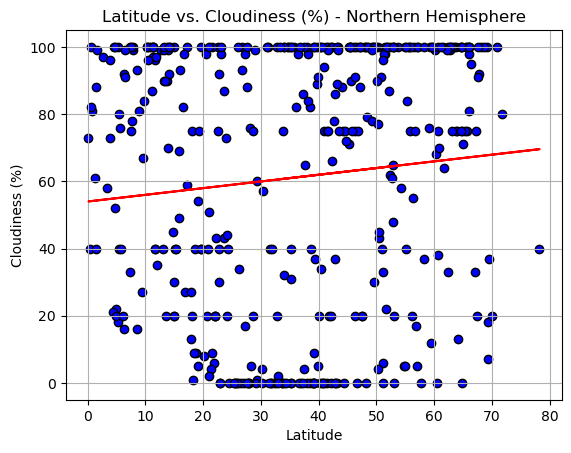

In [40]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.43x + 70.07
The r-value is: 0.16410986291280433


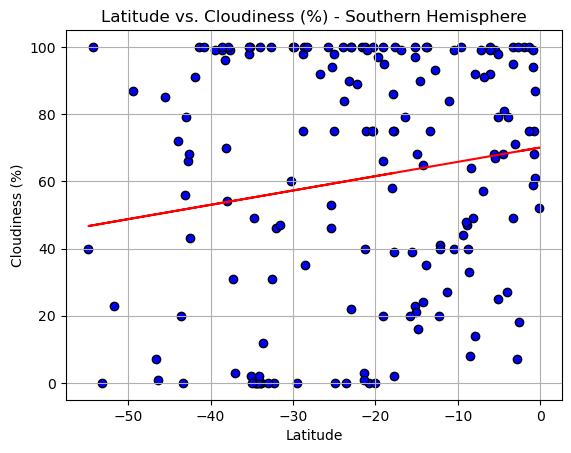

In [41]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** The line represents the percetanges of the cloudiness in cities in the southern hemisphere where the latitude close to 0, the higher the cloudiness in the cities. The graph shows a great distribution between the cities for the cloudiness with a representation of the line between 40% to 70% of cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.02x + 2.58
The r-value is: 0.16774518802463262


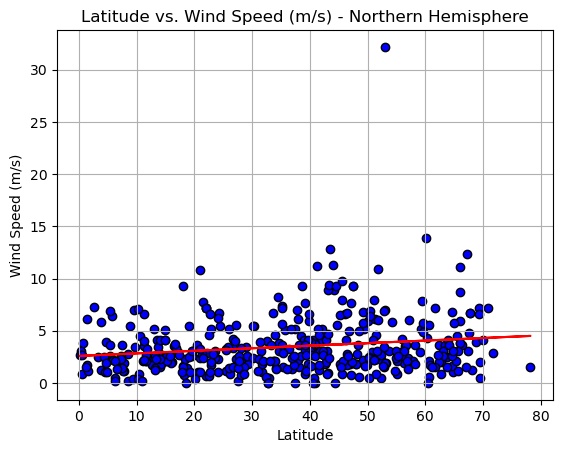

In [44]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.03x + 2.85
The r-value is: -0.1660286998773163


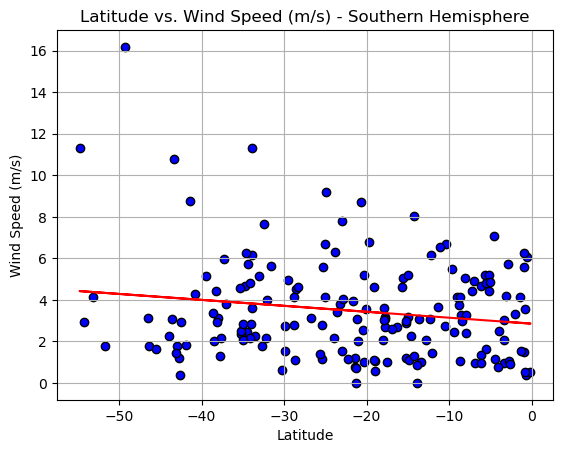

In [45]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** The line on the graph shows a decrease in wind speed as we move towards the southern hemisphere. This means that closer to the equator (latitude 0), the wind speed is lower. The graph overall indicates that the wind speed for most cities falls between 0 to 12 m/s.